In [1]:
import pymaid
import navis as nv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import scikit_posthocs as sp
from matplotlib.ticker import PercentFormatter

#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"<token>")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [2]:
def get_cable_overlap(OSNannotations, PN = None):
    OSNs = pymaid.get_skids_by_annotation(OSNannotations, allow_partial = False, intersect = True)
    neurons = pymaid.get_neuron(OSNs)
    
    if PN == None:
        cable_overlap = nv.cable_overlap(neurons, neurons, dist= "2 microns")
        return cable_overlap
    
    else:
        PN = pymaid.get_neuron(PN)
        PN_cable_overlap = nv.cable_overlap(neurons, PN, dist= "2 microns")
        
        return PN_cable_overlap

def get_num_connectors(neuron1, neuron2):
    df = pymaid.get_connectors_between(neuron1, neuron2, directional=True)
    return len(df)

def synapses_per_micron(cable_overlap_df, PN = None):
    for rowIndex, row in cable_overlap_df.iterrows(): #iterate over rows
        for columnIndex, value in row.items():
            cable_overlap_df.loc[rowIndex, columnIndex] = (get_num_connectors(rowIndex, columnIndex) / value) * 1000
    return cable_overlap_df

In [3]:
OSNsMD3_feedforward = get_cable_overlap(['innervates MD3', 'left palp nerve', 'sensory neuron', 'PSPs done'], PN = '11126')
MD3_feedforward_synapses_per_micron = synapses_per_micron(OSNsMD3_feedforward)
MD3_feedforward_synapses_per_micron

Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


,11126
8961,0.925549
7075,0.839093
7270,0.953678
7787,1.052993
1101,1.274046
8399,1.000934
7089,1.066180
7769,1.183488
7230,1.172412
7775,1.405312


In [4]:
OSNsMD2_feedforward = get_cable_overlap(['innervates MD2', 'left palp nerve', 'sensory neuron', 'PSPs done'], PN = '690')
MD2_feedforward_synapses_per_micron = synapses_per_micron(OSNsMD2_feedforward)
MD2_feedforward_synapses_per_micron

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


,690
9064,0.569158
7209,0.758083
718,1.109861
7983,0.980727
947,0.789441
7325,0.976681
728,1.287942
7353,1.005374
7197,0.978193
7135,0.540807


In [5]:
OSNsMD1_feedforward = get_cable_overlap(['innervates MD1', 'left palp nerve', 'sensory neuron', 'PSPs done'], PN = '295')
MD1_feedforward_synapses_per_micron = synapses_per_micron(OSNsMD1_feedforward)
MD1_feedforward_synapses_per_micron

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

Calc. overlap:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


,295
7172,0.383705
7815,0.491012
873,0.308897
6736,0.343299
881,0.406713
6975,0.490852
324409,0.575214
953,0.447481
5021,0.542036
671,0.340404


In [6]:
MD1_list=MD1_feedforward_synapses_per_micron["295"].values.tolist()
MD2_list=MD2_feedforward_synapses_per_micron["690"].values.tolist()
MD3_list=MD3_feedforward_synapses_per_micron["11126"].values.tolist()

In [7]:
#make dataframe

data_dict = {"1": MD1_list, "2": MD2_list, "3": MD3_list}
pre_df = {"Glomerulus": [], "OSN → uPN synapses per micron": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN → uPN synapses per micron"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,OSN → uPN synapses per micron
0,1,0.383705
1,1,0.491012
2,1,0.308897
3,1,0.343299
4,1,0.406713
5,1,0.490852
6,1,0.575214
7,1,0.447481
8,1,0.542036
9,1,0.340404


In [8]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot2(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["violet", "#0000FF", 'mediumspringgreen']
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans.


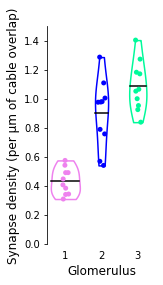

In [9]:
#make plot with annotations, from dataframe
x = "Glomerulus"
y = "OSN → uPN synapses per micron"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('Synapse density (per µm of cable overlap)', size=12, fontname="Liberation Sans")
ax.set_aspect(4)
plt.ylim(0,1.5)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)

plt.savefig('../svg/feedforward_cableoverlap.svg', format="svg")

plt.show()

In [10]:
md1=df[df[x]=="1"]
md1=md1[y].values.tolist()
md2=df[df[x]=='2']
md2=md2[y].values.tolist()
md3=df[df[x]=='3']
md3=md3[y].values.tolist()

stats.kruskal(md1, md2, md3) # non-parametric anova

KruskalResult(statistic=19.636129032258054, pvalue=5.445888655433388e-05)

In [11]:
sp.posthoc_dunn(df,y,x,'bonferroni')

,1,2,3
1,1.000000,0.005829,0.000053
2,0.005829,1.000000,0.697667
3,0.000053,0.697667,1.000000
